# Import Libraries and Dependencies

In [30]:
import pandas as pd  # import pandas library for data manipulation and analysis
import matplotlib.pyplot as plt  # import matplotlib library for plotting
import seaborn as sns  # import seaborn library for advanced data visualization
from ucimlrepo import fetch_ucirepo  # import fetch_ucirepo function from ucimlrepo for fetching datasets
import lhsmdu  # import lhsmdu library for latin hypercube sampling with multidimensional uniformity
import pyDOE  # import pyDOE library for design of experiments
from pyDOE import lhs  # import lhs function from pyDOE for latin hypercube sampling
import numpy as np  # import numpy library for numerical operations
from table_evaluator import TableEvaluator  # import TableEvaluator class from table_evaluator for table evaluation

# Extract Feature and Target Sets, and Merge Into Larger Dataframe

In [31]:
parkinsons = fetch_ucirepo(id=174)  # fetch the parkinsons dataset from the uci machine learning repository using its id
X = parkinsons.data.features  # extract the features (independent variables) from the dataset
y = parkinsons.data.targets  # extract the targets (dependent variables) from the dataset
print(parkinsons.metadata)  # print the metadata of the parkinsons dataset, which includes details like description, source, and usage
print(parkinsons.variables)  # print the variables (columns) of the parkinsons dataset, showing the names and types of features and targets

{'uci_id': 174, 'name': 'Parkinsons', 'repository_url': 'https://archive.ics.uci.edu/dataset/174/parkinsons', 'data_url': 'https://archive.ics.uci.edu/static/public/174/data.csv', 'abstract': "Oxford Parkinson's Disease Detection Dataset", 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 197, 'num_features': 22, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['status'], 'index_col': ['name'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2007, 'last_updated': 'Wed Feb 14 2024', 'dataset_doi': '10.24432/C59C74', 'creators': ['Max Little'], 'intro_paper': {'title': 'Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection', 'authors': 'Max A. Little, P. McSharry, S. Roberts, D. Costello, I. Moroz', 'published_in': 'BioMedical Engineering OnLine', 'year': 2007, 'url': 'https://www.semanticscholar.org/paper/27e1dcd0d64bfc9d936e597d4f29b8

In [32]:
X.dropna() #drop columns with illegitimate values
X

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00459,0.00263,0.00259,0.00790,0.04087,0.04087,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00564,0.00331,0.00292,0.00994,0.02751,0.02751,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.01360,0.00624,0.00564,0.01873,0.02308,0.02308,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00740,0.00370,0.00390,0.01109,0.02296,0.02296,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [33]:
y.dropna() #drop columns with illegitimate values

,status
0,1
1,1
2,1
3,1
4,1
...,...
190,0
191,0
192,0
193,0


In [34]:
#create columns called 'row_num' to later merge the two dataframes
X["row_num"] = X.index
y["row_num"] = y.index

C:\Users\Keerthana\AppData\Local\Temp\ipykernel_26204\2332977538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["row_num"] = X.index
C:\Users\Keerthana\AppData\Local\Temp\ipykernel_26204\2332977538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y["row_num"] = y.index


In [35]:
X

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,row_num
0,119.992,157.302,74.997,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,0
1,122.400,148.650,113.819,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,2
3,116.676,137.871,111.366,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,3
4,116.014,141.781,110.655,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00459,0.00263,0.00259,0.00790,0.04087,0.04087,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,190
191,209.516,253.017,89.488,0.00564,0.00564,0.00331,0.00292,0.00994,0.02751,0.02751,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,191
192,174.688,240.005,74.287,0.01360,0.01360,0.00624,0.00564,0.01873,0.02308,0.02308,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,192
193,198.764,396.961,74.904,0.00740,0.00740,0.00370,0.00390,0.01109,0.02296,0.02296,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,193


In [36]:
y

,status,row_num
0,1,0
1,1,1
2,1,2
3,1,3
4,1,4
...,...,...
190,0,190
191,0,191
192,0,192
193,0,193


In [37]:
#merge dataframes
df = pd.merge(X, y, on="row_num")

In [38]:
df

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,row_num,status
0,119.992,157.302,74.997,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,...,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,0,1
1,122.400,148.650,113.819,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,...,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1,1
2,116.682,131.111,111.555,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,...,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,2,1
3,116.676,137.871,111.366,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,...,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,3,1
4,116.014,141.781,110.655,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,...,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00459,0.00263,0.00259,0.00790,0.04087,0.04087,...,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,190,0
191,209.516,253.017,89.488,0.00564,0.00564,0.00331,0.00292,0.00994,0.02751,0.02751,...,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,191,0
192,174.688,240.005,74.287,0.01360,0.01360,0.00624,0.00564,0.01873,0.02308,0.02308,...,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,192,0
193,198.764,396.961,74.904,0.00740,0.00740,0.00370,0.00390,0.01109,0.02296,0.02296,...,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,193,0


In [39]:
#drop column after merge
df = df.drop(columns=["row_num"], axis=1)
df

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,119.992,157.302,74.997,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,122.400,148.650,113.819,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,116.682,131.111,111.555,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,116.676,137.871,111.366,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,116.014,141.781,110.655,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00459,0.00263,0.00259,0.00790,0.04087,0.04087,...,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,209.516,253.017,89.488,0.00564,0.00564,0.00331,0.00292,0.00994,0.02751,0.02751,...,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,174.688,240.005,74.287,0.01360,0.01360,0.00624,0.00564,0.01873,0.02308,0.02308,...,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,198.764,396.961,74.904,0.00740,0.00740,0.00370,0.00390,0.01109,0.02296,0.02296,...,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


# Analysis of Feature Set

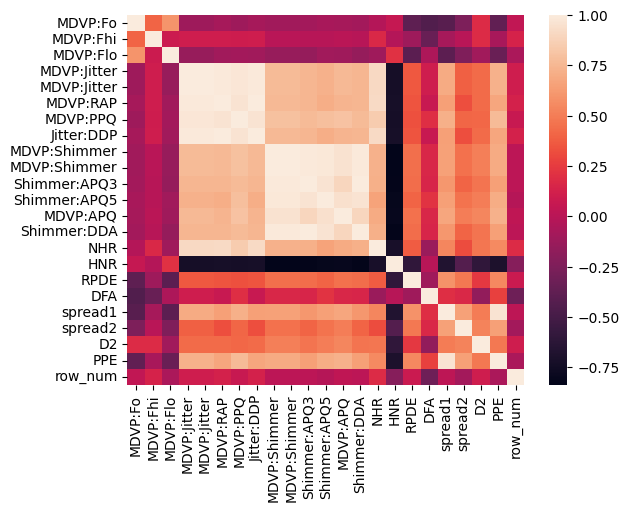

In [40]:
#in the heatmap, we can observe the gravity of correlations between different feature sets. Evidently, the correlation between MDVP:Fhi, MDVP:Fo, and MDVP:Flo with other features is minimal
#minimal correlation indicates given features may not be necessary in the training process. 
sns.heatmap(X.corr())
plt.show()

In [41]:
#drop columns with minimal correlation
new_df = df.drop(columns=["MDVP:Fo", "MDVP:Fhi", "MDVP:Flo"], axis=1)
new_df

,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.00459,0.00459,0.00263,0.00259,0.00790,0.04087,0.04087,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050,0
191,0.00564,0.00564,0.00331,0.00292,0.00994,0.02751,0.02751,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895,0
192,0.01360,0.01360,0.00624,0.00564,0.01873,0.02308,0.02308,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728,0
193,0.00740,0.00740,0.00370,0.00390,0.01109,0.02296,0.02296,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306,0


<Axes: >

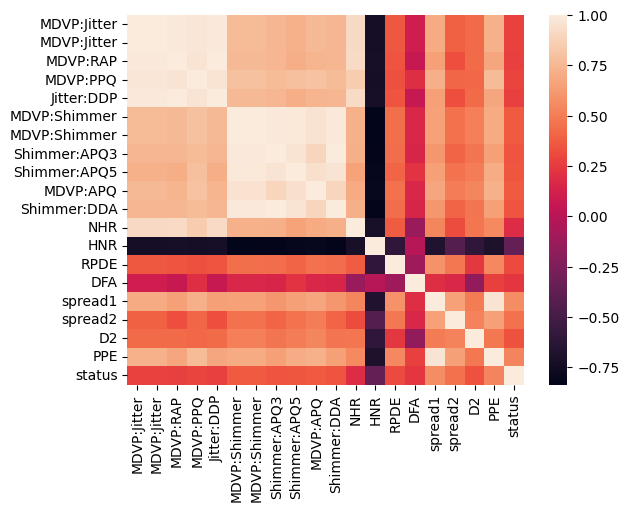

In [42]:
#new heatmap
sns.heatmap(new_df.corr())

In [43]:
#drop columns that aren't correlated
new_df1 = new_df.drop(columns=["DFA"], axis=1)
new_df1

,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,spread1,spread2,D2,PPE,status
0,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,-4.813031,0.266482,2.301442,0.284654,1
1,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,-4.075192,0.335590,2.486855,0.368674,1
2,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,-4.443179,0.311173,2.342259,0.332634,1
3,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,-4.117501,0.334147,2.405554,0.368975,1
4,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,-3.747787,0.234513,2.332180,0.410335,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.00459,0.00459,0.00263,0.00259,0.00790,0.04087,0.04087,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0.448439,-6.538586,0.121952,2.657476,0.133050,0
191,0.00564,0.00564,0.00331,0.00292,0.00994,0.02751,0.02751,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0.431674,-6.195325,0.129303,2.784312,0.168895,0
192,0.01360,0.01360,0.00624,0.00564,0.01873,0.02308,0.02308,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0.407567,-6.787197,0.158453,2.679772,0.131728,0
193,0.00740,0.00740,0.00370,0.00390,0.01109,0.02296,0.02296,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0.451221,-6.744577,0.207454,2.138608,0.123306,0


In [44]:
#print more information on data features for better analysis and interpretation later on
display(new_df1.describe().T)

,count,mean,std,min,25%,50%,75%,max
MDVP:Jitter,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter,195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
Shimmer:APQ3,195.0,0.015664,0.010153,0.004550,0.008245,0.012790,0.020265,0.056470
Shimmer:APQ5,195.0,0.017878,0.012024,0.005700,0.009580,0.013470,0.022380,0.079400
MDVP:APQ,195.0,0.024081,0.016947,0.007190,0.013080,0.018260,0.029400,0.137780


# Dataset-Based Initialization

### Selecting an initial subset of data for the surrogate model training using Latin Hypercube Sampling

In [45]:
n_samples = 1000  # define the number of Latin hypercube samples to generate
n_params = new_df1.shape[1]  # determine the number of parameters (columns) in the DataFrame new_df1

# generate Latin hypercube samples with n_params parameters and n_samples samples
lhs_samples = lhs(n_params, n_samples)

# create an empty array with the same shape as lhs_samples to store scaled samples
scaled_samples = np.zeros_like(lhs_samples)

# loop through each parameter to scale the samples
for i in range(n_params):
    param_min = new_df1.iloc[0, i]  # get the minimum value of the ith parameter from the DataFrame new_df1
    param_max = new_df1.iloc[1, i]  # get the maximum value of the ith parameter from the DataFrame new_df1
    scaled_samples[:, i] = param_min + (param_max - param_min) * lhs_samples[:, i]  # scale the Latin hypercube samples

# create a DataFrame containing the scaled Latin hypercube samples with column names from new_df1
lhs_df = pd.DataFrame(scaled_samples, columns=new_df1.columns)

print(lhs_df)  # print the DataFrame containing the scaled Latin hypercube samples


     MDVP:Jitter  MDVP:Jitter  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0       0.007883     0.009322  0.004622  0.006354    0.013909      0.056687   
1       0.009438     0.007843  0.003998  0.006082    0.012454      0.043936   
2       0.008284     0.008239  0.004495  0.006108    0.011777      0.048367   
3       0.009673     0.009669  0.004018  0.006945    0.013619      0.053189   
4       0.009374     0.008056  0.003951  0.006521    0.012820      0.044916   
..           ...          ...       ...       ...         ...           ...   
995     0.008953     0.008500  0.004245  0.005785    0.012344      0.053231   
996     0.009208     0.009264  0.004641  0.006516    0.012120      0.059280   
997     0.009476     0.007860  0.003947  0.006744    0.011191      0.054037   
998     0.009239     0.009495  0.004133  0.005629    0.013021      0.050481   
999     0.009598     0.009289  0.003985  0.005589    0.012021      0.046595   

     MDVP:Shimmer  Shimmer:APQ3  Shimmer:APQ5  MDVP

In [46]:
add_df = pd.DataFrame(lhs_df)

In [47]:
add_df

,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,spread1,spread2,D2,PPE,status
0,0.007883,0.009322,0.004622,0.006354,0.013909,0.056687,0.051707,0.025729,0.033856,0.042101,0.084119,0.020198,19.850465,0.431435,-4.666082,0.309694,2.445286,0.336741,1.0
1,0.009438,0.007843,0.003998,0.006082,0.012454,0.043936,0.045468,0.027465,0.044885,0.033936,0.068247,0.021201,19.100558,0.424018,-4.158445,0.328830,2.332115,0.339915,1.0
2,0.008284,0.008239,0.004495,0.006108,0.011777,0.048367,0.048412,0.031216,0.044240,0.034130,0.079264,0.020786,20.220060,0.439529,-4.578872,0.311438,2.469399,0.315973,1.0
3,0.009673,0.009669,0.004018,0.006945,0.013619,0.053189,0.054505,0.024481,0.036317,0.036847,0.072305,0.020744,20.342514,0.430388,-4.163936,0.270741,2.445853,0.340958,1.0
4,0.009374,0.008056,0.003951,0.006521,0.012820,0.044916,0.046069,0.025182,0.037611,0.035683,0.080447,0.019335,19.144724,0.448486,-4.707175,0.281640,2.450257,0.296205,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.008953,0.008500,0.004245,0.005785,0.012344,0.053231,0.058192,0.028435,0.042087,0.040257,0.074481,0.019727,19.159204,0.424530,-4.434690,0.293515,2.460182,0.301693,1.0
996,0.009208,0.009264,0.004641,0.006516,0.012120,0.059280,0.048749,0.028261,0.034826,0.040288,0.089933,0.021970,19.312461,0.434997,-4.558267,0.306850,2.352408,0.354739,1.0
997,0.009476,0.007860,0.003947,0.006744,0.011191,0.054037,0.059992,0.029770,0.038735,0.035585,0.082030,0.021000,19.665807,0.455612,-4.761869,0.275627,2.430191,0.316588,1.0
998,0.009239,0.009495,0.004133,0.005629,0.013021,0.050481,0.046724,0.025691,0.043926,0.033120,0.068747,0.019497,20.840748,0.432508,-4.754102,0.326010,2.473659,0.354833,1.0


In [48]:
print(add_df["status"])

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: status, Length: 1000, dtype: float64


In [49]:
print(new_df1["status"])

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


In [50]:
df.index[new_df1['status']==0].tolist()

[30,
 31,
 32,
 33,
 34,
 35,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 60,
 61,
 62,
 63,
 64,
 65,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194]

In [51]:
df2 = new_df1.iloc[new_df1.index[new_df1['status']==0].tolist(),:] 

In [52]:
df2

,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,spread1,spread2,D2,PPE,status
30,0.00289,0.00289,0.00166,0.00168,0.00498,0.01098,0.01098,0.00563,0.00680,0.00802,0.01689,0.00339,26.775,0.422229,-7.348300,0.177551,1.743867,0.085569,0
31,0.00241,0.00241,0.00134,0.00138,0.00402,0.01015,0.01015,0.00504,0.00641,0.00762,0.01513,0.00167,30.940,0.432439,-7.682587,0.173319,2.103106,0.068501,0
32,0.00212,0.00212,0.00113,0.00135,0.00339,0.01263,0.01263,0.00640,0.00825,0.00951,0.01919,0.00119,30.775,0.465946,-7.067931,0.175181,1.512275,0.096320,0
33,0.00180,0.00180,0.00093,0.00107,0.00278,0.00954,0.00954,0.00469,0.00606,0.00719,0.01407,0.00072,32.684,0.368535,-7.695734,0.178540,1.544609,0.056141,0
34,0.00178,0.00178,0.00094,0.00106,0.00283,0.00958,0.00958,0.00468,0.00610,0.00726,0.01403,0.00065,33.047,0.340068,-7.964984,0.163519,1.423287,0.044539,0
35,0.00198,0.00198,0.00105,0.00115,0.00314,0.01194,0.01194,0.00586,0.00760,0.00957,0.01758,0.00135,31.732,0.344252,-7.777685,0.170183,2.447064,0.057610,0
42,0.00298,0.00298,0.00169,0.00182,0.00507,0.01752,0.01752,0.01035,0.01024,0.01133,0.03104,0.00740,22.736,0.305062,-7.310550,0.098648,2.416838,0.095032,0
43,0.00281,0.00281,0.00157,0.00173,0.00470,0.01760,0.01760,0.01006,0.01038,0.01251,0.03017,0.00675,23.145,0.457702,-6.793547,0.158266,2.256699,0.117399,0
44,0.00210,0.00210,0.00109,0.00137,0.00327,0.01419,0.01419,0.00777,0.00898,0.01033,0.02330,0.00454,25.368,0.438296,-7.057869,0.091608,2.330716,0.091470,0
45,0.00225,0.00225,0.00117,0.00139,0.00350,0.01494,0.01494,0.00847,0.00879,0.01014,0.02542,0.00476,25.032,0.431285,-6.995820,0.102083,2.365800,0.102706,0


In [53]:
n_samples = 1000
n_params = df2.shape[1]

lhs_samples = lhs(n_params, n_samples)

scaled_samples = np.zeros_like(lhs_samples)
for i in range(n_params):
    param_min = df.iloc[0, i]
    param_max = df.iloc[1, i]
    if df2.columns[i] == 'status':
        scaled_samples[:, i] = 0  
    else:
        scaled_samples[:, i] = param_min + (param_max - param_min) * lhs_samples[:, i]

lhs_df = pd.DataFrame(scaled_samples, columns=df2.columns)

print(lhs_df)

     MDVP:Jitter  MDVP:Jitter    MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0     121.953942   155.002222   75.709094  0.007963    0.008671      0.003814   
1     121.126472   149.533362   92.578833  0.009161    0.009670      0.004076   
2     120.474794   153.602251  106.157852  0.008379    0.008026      0.004023   
3     121.607476   150.317034   76.203444  0.009652    0.009439      0.004474   
4     121.447731   156.308565   82.564386  0.008693    0.008493      0.004071   
..           ...          ...         ...       ...         ...           ...   
995   121.042143   151.999120  100.417072  0.009002    0.009120      0.003827   
996   121.673982   155.044200   86.880603  0.009362    0.008644      0.004620   
997   122.331192   154.423253  113.528427  0.008297    0.009258      0.003706   
998   120.593634   151.033439   89.674471  0.009472    0.008915      0.004598   
999   121.256146   150.029529   81.827389  0.008209    0.008087      0.004499   

     MDVP:Shimmer  Shimmer:

In [54]:
add_df_2 = pd.DataFrame(lhs_df)

In [55]:
add_df_2

,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,spread1,spread2,D2,PPE,status
0,121.953942,155.002222,75.709094,0.007963,0.008671,0.003814,0.005770,0.013859,0.044926,0.050936,0.029794,0.033628,0.034028,0.086953,0.021661,20.037550,0.416597,0.816320,0.0
1,121.126472,149.533362,92.578833,0.009161,0.009670,0.004076,0.005749,0.012797,0.058099,0.054775,0.029339,0.041857,0.041669,0.076608,0.019592,20.457062,0.442055,0.816246,0.0
2,120.474794,153.602251,106.157852,0.008379,0.008026,0.004023,0.006454,0.011957,0.057731,0.051464,0.022111,0.038562,0.040653,0.084516,0.021638,20.344440,0.454734,0.819318,0.0
3,121.607476,150.317034,76.203444,0.009652,0.009439,0.004474,0.006791,0.012528,0.045661,0.052050,0.022005,0.032091,0.029757,0.086938,0.021862,19.633117,0.439382,0.818629,0.0
4,121.447731,156.308565,82.564386,0.008693,0.008493,0.004071,0.006228,0.012308,0.047068,0.059776,0.027656,0.045085,0.043552,0.072225,0.020458,20.421344,0.453428,0.816047,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,121.042143,151.999120,100.417072,0.009002,0.009120,0.003827,0.006609,0.013201,0.061230,0.058567,0.025605,0.044094,0.036097,0.081237,0.021801,19.716000,0.456029,0.816986,0.0
996,121.673982,155.044200,86.880603,0.009362,0.008644,0.004620,0.006531,0.013766,0.059270,0.048144,0.024329,0.037367,0.036077,0.075211,0.021893,19.153184,0.432084,0.815917,0.0
997,122.331192,154.423253,113.528427,0.008297,0.009258,0.003706,0.006132,0.013481,0.048602,0.045399,0.029648,0.038378,0.031998,0.083622,0.021878,19.552611,0.435698,0.818886,0.0
998,120.593634,151.033439,89.674471,0.009472,0.008915,0.004598,0.006391,0.012459,0.045861,0.060830,0.028126,0.034279,0.031976,0.076510,0.021853,20.996976,0.429162,0.815314,0.0


In [57]:
#dropped columns were not able to be extracted from final audio due to extreme usage of memory. code is currently being 
#improved to mitigate this problem in the future
add_df = add_df.drop(columns=["D2", "NHR", "HNR", "RPDE", "spread1", "spread2", "PPE"], axis=1)
add_df_2 = add_df_2.drop(columns=["D2", "NHR", "HNR", "RPDE", "spread1", "spread2", "PPE"], axis=1)

merged_df = pd.concat([add_df, add_df_2], ignore_index=True)
merged_df

,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,status
0,0.007883,0.009322,0.004622,0.006354,0.013909,0.056687,0.051707,0.025729,0.033856,0.042101,0.084119,1.0
1,0.009438,0.007843,0.003998,0.006082,0.012454,0.043936,0.045468,0.027465,0.044885,0.033936,0.068247,1.0
2,0.008284,0.008239,0.004495,0.006108,0.011777,0.048367,0.048412,0.031216,0.044240,0.034130,0.079264,1.0
3,0.009673,0.009669,0.004018,0.006945,0.013619,0.053189,0.054505,0.024481,0.036317,0.036847,0.072305,1.0
4,0.009374,0.008056,0.003951,0.006521,0.012820,0.044916,0.046069,0.025182,0.037611,0.035683,0.080447,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,121.042143,151.999120,100.417072,0.009002,0.009120,0.003827,0.006609,0.013201,0.061230,0.058567,0.025605,0.0
1996,121.673982,155.044200,86.880603,0.009362,0.008644,0.004620,0.006531,0.013766,0.059270,0.048144,0.024329,0.0
1997,122.331192,154.423253,113.528427,0.008297,0.009258,0.003706,0.006132,0.013481,0.048602,0.045399,0.029648,0.0
1998,120.593634,151.033439,89.674471,0.009472,0.008915,0.004598,0.006391,0.012459,0.045861,0.060830,0.028126,0.0


In [28]:
#export new, preprocessed dataset
csv_data =merged_df.to_csv('audio_data.csv', index=True) #export synthetic dataset 